<a href="https://colab.research.google.com/github/kc6699c/Komal_INFO5731_Fall2024/blob/main/Cherukuri_INFO5731_Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
import pandas as pd

def load_data(filepath):
    data = []
    with open(filepath, 'r') as file:
        for line in file:
            label, text = line[0], line[2:].strip()
            data.append({'label': int(label), 'text': text})
    return pd.DataFrame(data)

train_data = load_data('/content/stsa-train.txt')
test_data = load_data('/content/stsa-test.txt')

print(train_data.head())

   label                                               text
0      1  a stirring , funny and finally transporting re...
1      0  apparently reassembled from the cutting-room f...
2      0  they presume their audience wo n't sit still f...
3      1  this is a visually stunning rumination on love...
4      1  jonathan parker 's bartleby should have been t...


In [ ]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

print(f"Training data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")

Training data size: 5536
Validation data size: 1384


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['text'])
X_val = vectorizer.transform(val_data['text'])
X_test = vectorizer.transform(test_data['text'])

y_train = train_data['label']
y_val = val_data['label']
y_test = test_data['label']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"{model_name} Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

MultinomialNB Accuracy: 0.7831 (+/- 0.0083)
SVM Accuracy: 0.7682 (+/- 0.0122)
KNN Accuracy: 0.6389 (+/- 0.0246)
DecisionTree Accuracy: 0.6111 (+/- 0.0218)
RandomForest Accuracy: 0.7018 (+/- 0.0151)
XGBoost Accuracy: 0.6907 (+/- 0.0175)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    evaluate_model(model, X_train, y_train, X_test, y_test)

Evaluating MultinomialNB...
Accuracy: 0.8034
Precision: 0.7769
Recall: 0.8504
F1-Score: 0.8120
Evaluating SVM...
Accuracy: 0.7946
Precision: 0.7807
Recall: 0.8185
F1-Score: 0.7991
Evaluating KNN...
Accuracy: 0.6601
Precision: 0.7617
Recall: 0.4642
F1-Score: 0.5769
Evaluating DecisionTree...
Accuracy: 0.6178
Precision: 0.6090
Recall: 0.6546
F1-Score: 0.6310
Evaluating RandomForest...
Accuracy: 0.7183
Precision: 0.6996
Recall: 0.7635
F1-Score: 0.7301
Evaluating XGBoost...
Accuracy: 0.7139
Precision: 0.6816
Recall: 0.8009
F1-Score: 0.7365


In [ ]:
!pip install gensim
!pip install scikit-learn

In [ ]:
import gensim
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

train_data['tokenized'] = train_data['text'].apply(lambda x: x.split())
val_data['tokenized'] = val_data['text'].apply(lambda x: x.split())
test_data['tokenized'] = test_data['text'].apply(lambda x: x.split())

w2v_model = gensim.models.Word2Vec(sentences=train_data['tokenized'], vector_size=100, window=5, min_count=1, workers=4)

def text_to_vector(text, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in text:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    return vector / count if count > 0 else vector

X_train_w2v = np.array([text_to_vector(tokens, w2v_model) for tokens in train_data['tokenized']])
X_val_w2v = np.array([text_to_vector(tokens, w2v_model) for tokens in val_data['tokenized']])
X_test_w2v = np.array([text_to_vector(tokens, w2v_model) for tokens in test_data['tokenized']])

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_w2v, y_train)

y_pred_w2v = rf_model.predict(X_test_w2v)
print("Word2Vec Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_w2v):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_w2v):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_w2v):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_w2v):.4f}")

Word2Vec Classifier Results:
Accuracy: 0.5695
Precision: 0.5575
Recall: 0.6667
F1-Score: 0.6072


In [ ]:
!pip install transformers torch scikit-learn
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datasets import Dataset

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=128)

train_dataset = Dataset.from_pandas(train_data)
val_dataset = Dataset.from_pandas(val_data)
test_dataset = Dataset.from_pandas(test_data)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.rename_column("label", "labels")
val_dataset = val_dataset.rename_column("label", "labels")
test_dataset = test_dataset.rename_column("label", "labels")

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10
)

def compute_metrics(pred):
    predictions, labels = pred
    predictions = predictions.argmax(axis=1)
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

results = trainer.evaluate(test_dataset)
print(results)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/5536 [00:00<?, ? examples/s]

Map:   0%|          | 0/1384 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:


Abort: 

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [2]:
# Write your code here
import pandas as pd

file_path = '/content/Amazon_Unlocked_Mobile.csv'
data = pd.read_csv(file_path)

data = data.dropna(subset=['Reviews'])
texts = data['Reviews'].tolist()

print(f"Loaded {len(texts)} reviews.")

Loaded 5424 reviews.


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(texts).toarray()

print(f"TF-IDF matrix shape: {X_tfidf.shape}")

TF-IDF matrix shape: (5424, 1000)


In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_tfidf)

data['KMeans_Cluster'] = kmeans.labels_
print(data['KMeans_Cluster'].value_counts())

KMeans_Cluster
2    5325
4      94
3       2
1       2
0       1
Name: count, dtype: int64


In [5]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tfidf)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

data['DBSCAN_Cluster'] = dbscan_labels
print(data['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
-1     4687
 3      140
 5      116
 0       63
 1       62
 2       47
 13      38
 8       25
 14      22
 9       22
 12      22
 17      22
 11      20
 20      12
 23      10
 16      10
 24      10
 21       9
 18       8
 28       8
 22       7
 7        7
 4        7
 6        7
 25       7
 10       6
 19       5
 15       5
 26       5
 27       5
 29       5
 30       5
Name: count, dtype: int64


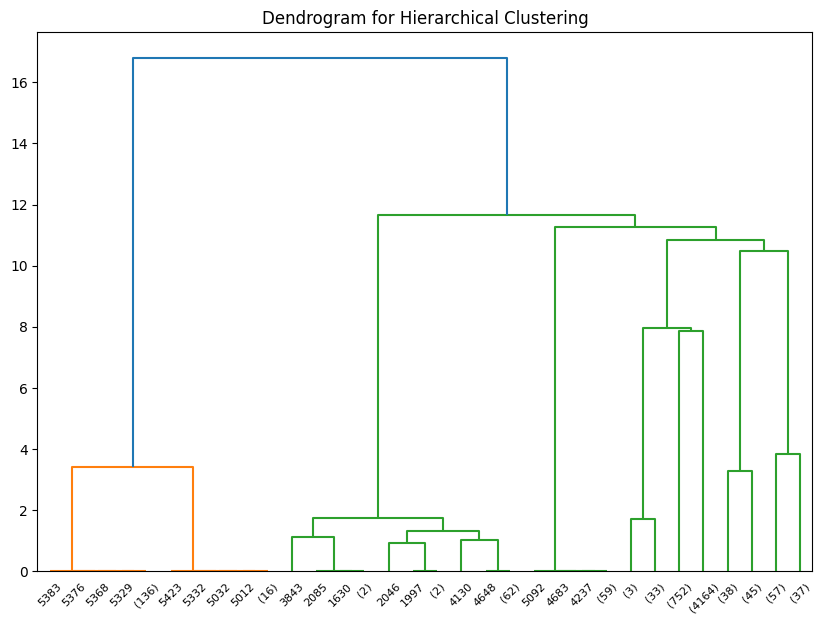

Hierarchical_Cluster
1    4952
0     177
4     160
2      73
3      62
Name: count, dtype: int64


In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linkage_matrix = linkage(X_tfidf, method='ward')

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()
hierarchical = AgglomerativeClustering(n_clusters=5)
data['Hierarchical_Cluster'] = hierarchical.fit_predict(X_tfidf)
print(data['Hierarchical_Cluster'].value_counts())

In [7]:
import gensim
from sklearn.cluster import KMeans
import numpy as np

tokenized_texts = [text.split() for text in texts]

w2v_model = gensim.models.Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

def text_to_vector(text, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in text:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    return vector / count if count > 0 else vector

X_w2v = np.array([text_to_vector(tokens, w2v_model) for tokens in tokenized_texts])

kmeans_w2v = KMeans(n_clusters=5, random_state=42)
data['Word2Vec_Cluster'] = kmeans_w2v.fit_predict(X_w2v)
print(data['Word2Vec_Cluster'].value_counts())

Word2Vec_Cluster
0    2699
2    1281
4     874
1     399
3     171
Name: count, dtype: int64


In [8]:
from sentence_transformers import SentenceTransformer

# Load pre-trained BERT model
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encode texts using BERT
X_bert = bert_model.encode(texts)

# Apply K-means clustering on BERT embeddings
kmeans_bert = KMeans(n_clusters=5, random_state=42)
data['BERT_Cluster'] = kmeans_bert.fit_predict(X_bert)
print(data['BERT_Cluster'].value_counts())

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

BERT_Cluster
0    1738
4    1394
3    1094
1     789
2     409
Name: count, dtype: int64


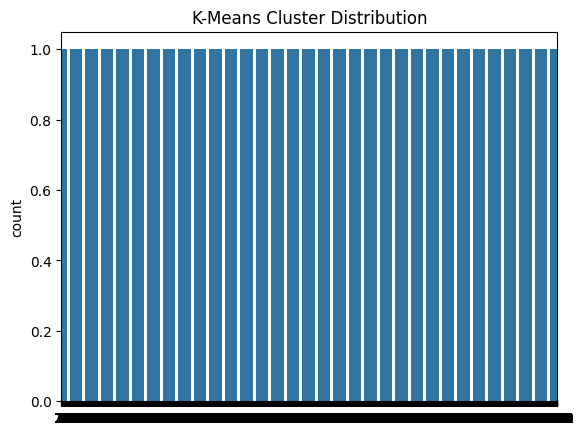

In [9]:
data.to_csv('clustered_reviews.csv', index=False)

import seaborn as sns
sns.countplot(data['KMeans_Cluster'])
plt.title("K-Means Cluster Distribution")
plt.show()

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

The clustering methods K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT all gave different results based on how they work. K-means is simple and fast, and it made good groups, but it can miss complicated patterns in the data. DBSCAN found small groups and also marked many points as noise (-1), which is good for detecting outliers, but it didn’t work well with text that is too spread out. Hierarchical clustering made a nice tree-like diagram (dendrogram) that shows how the data is connected, but it takes a lot of time and is not good for big data. Word2Vec used word meanings to make clusters, but it only worked well when words had proper embeddings and similar meanings. BERT did the best because it understood the deeper meaning of the text and made balanced clusters, showing it is more powerful for finding hidden patterns in text.



# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Very less time to do the assignment.



'''